<a href="https://colab.research.google.com/github/shirleyrutgers/GIS/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PS1

#ps0:
think about data to answer your questions; make 1st map; due sep11
 [version: Friday 5th September, 2025 09:09]
 [upto 3 points of extra credit]
 getting to know your data takes time! value your time! and gure out data youll use in this class asap !!! producing maps is fast; but
 data management is 20-80% of time !!!
 1. think hard about data (and U/A or level of analysis) youll use in your career otherwise youll waste 50+ hours!! and write
 couple sentences/paragraphs about the data and variables you want to use to answer your research questions
 2. get your own GIS data (shape le); if you do not have dataset, search on the internet for a shape le, say for NJ counties: NJ
 counties, shape le and/or email listserv for help
 3. load the data into python, and produce a map (and submit ps as per directions below)

 Professor's comments for PS0 and my responses inline>
Professor's comments for PS0 and my responses inline> comments on research ideas from first class A: Professor Adam S: Shirley

A: possible to continue with and make maps from: https://github.com/shirleyrutgers/DataVis/blob/main/PS5.ipynb or do green areas; or ideally both! in this class you can do 2 (or more) unrelated projects!

S: For now I prefer to continue with my research about LQ

A: green areas and happiness there are super interesting neighborhood level data: https://mdi.georgetown.edu/pbi/greenspace/ and then can merge or join that with brfss 500 cities "places" dataset: https://www.cdc.gov/places/index.html and it has at least 2 wellbeing indicators: mental health and social support or maybe just follow this and use similar data sources at least for green areas https://www.sciencedirect.com/science/article/pii/S0169204623001305

these green areas data may be useful too: https://data.unhabitat.org/pages/open-spaces-and-green-areas

S: Thank you for the dataset, I think this one from UNHABITAD is very powerfull, but as I said I already have my dataset cleanned from VIS Class and still need to continue with that research topic.

A: otherwise there is a lot of natural science datasources, but they may be mostly raster or picture and very large and difficult to handle: there are land use data that cover whole earth, only download small size, like a state or region within a country

https://esa-worldcover.org/en/data-access and this tool looks useful incl download: https://viewer.esa-worldcover.org/worldcover/

https://www.usgs.gov/faqs/where-can-i-get-global-land-cover-data has a bunch of datasets

https://glad.earthengine.app/view/glcluc-2000-2020 maybe https://www.earthenv.org/landcover bunch of raster data

S:I checked all of them. Some use other formats to read, not just CSV. I am familiar with CSV when using Python. And they are US datasets. I was searching for datasets of green areas from the last 30 years in Denmark by regions. I explored all of them and found there is no time series data covering all regions as an appropriate dataset (example: only in specific years like 1995, 2000, 2010, 2020). So, I prefer to continue working with LQ in NJ. My first idea was to integrate both classes GIS and Happiness> maps and quantitative analysis between Happiness and Green areas in Denmark, but until now I am having trouble with the dataset, so until I clarify this issue, I prefer to continue with LQ in NJ.


#Continuation of PS5 Data Visualization
https://github.com/shirleyrutgers/DataVis/blob/main/PS5.ipynb

##Research Topic, Research Question, Hypothesis and Variables

###Research Topic:
The Relationship Between County GDP, Industry Structure, and Business Formation in New Jersey, using Location Quotients (LQ)

###Research Question:
Do counties in New Jersey with higher GDP levels and stronger private industry presence show greater levels of business formation?

###Hypothesis:
Counties with higher GDP and stronger concentrations of private-sector employment—measured by Location Quotients (LQ)—will have a higher number of business applications. Additionally, areas with stronger performance in key sectors like education and health services may also support more entrepreneurship, while counties with lower private-sector presence may benefit from targeted support.

###Key Variables:

- Business Applications (BA2023): Dependent variable – represents entrepreneurship activity
- Gross Domestic Product (GDP): Independent variable – shows overall economic strength
- GDP per Capita: Economic capacity per person
- Unemployment Rate: Indicator of economic stress
- Median Income: Control for income levels
- Location Quotient – Total Private Industry (LQ): Measures private-sector concentration vs. national average
- Location Quotient – Education & Health Services: Shows specialization in a key industry with potential for business growth

This study uses multiple datasets to explore how economic conditions, sector strength, and income levels influence business formation, helping identify counties that could benefit most from entrepreneurship support programs.

Unit of Analysis (U/A): The counties of New Jersey are the primary unit of analysis for this study.

Level of Analysis: The research is conducted at the county level, which allows for consistent comparisons across economic indicators.

Justification: The county level was chosen because data is readily available, comparable, and relevant for analyzing regional economic development and entrepreneurship patterns. It also aligns with policy considerations that often target counties as administrative and planning units.

The analysis focuses on 2023

##References
Acs, Z. J., Desai, S., & Hessels, J. (2008). *Entrepreneurship, economic development and institutions*. Small Business Economics, 31(3), 219–234.

Glaeser, E. L., Kerr, W. R., & Kerr, S. P. (2010). *What makes a city entrepreneurial?*. Journal of Urban Economics, 67(1), 90–108.

Federal Reserve Bank of St. Louis. (2012). *The relationships among changes in GDP, employment, and unemployment: This time it’s different*.

New Jersey Small Business Development Center (NJSBDC). (n.d.). *Annual Reports*.

New Jersey Department of Labor and Workforce Development. (n.d.). *SkillUp NJ*.

APEX Accelerator Program – New Jersey Institute of Technology. (n.d.). *PTAC Services*.

U.S. Census Bureau. (2025). *Business Formation Statistics – County Data*.

New Jersey Economic Development Authority. (2025). *NJCountyData.xlsx*.

Google Sheets (User Upload). (2025). *NJ GDP, population, and business data*.

New Jersey Labor Market Information. (2025). *Quarterly Census of Employment and Wages*.

#Section I. Instalations

In [2]:
%%capture
#!pip install geopandas #==1.0.1
!pip install mapclassify #sometimes have to install library which you get from https://pypi.org/


In [3]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

import seaborn as sns

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [4]:
#!python --version
gpd.__version__

'1.1.1'

#Section II. Map area of Interest

In [5]:
#link from drive, I have here the NJ shapefile zip> https://drive.google.com/file/d/166bfglrBJcu79edOYl56OQyOdLcb63IU/view?usp=sharing
#Link of my drive> https://drive.google.com/file/d/166bfglrBJcu79edOYl56OQyOdLcb63IU/view?usp=drive_link
#Hint> drive link has long format (https://drive.google.com/file/d/.../view). I have to change into this this format:
#https://docs.google.com/uc?id=ID_DEL_ARCHIVO&export=download
# El ID_DEL_ARCHIVO está en la URL de Drive después de file/d/ y antes de /view.
#My updated link https://docs.google.com/uc?id=166bfglrBJcu79edOYl56OQyOdLcb63IU&export=download

#Example from Professor code> nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
#Ref.> replicating the AOK code.
#Also read this how to upload a file into drive> https://theaok.github.io/generic/howToPutDataOnline.html

! wget -q -O nj-counties.zip https://docs.google.com/uc?id=166bfglrBJcu79edOYl56OQyOdLcb63IU&export=download #link from drive
# ! = run terminal command; wget = download; -q = quiet; -O = output name; saves file as nj-counties.zip; URL = direct download link

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); # open the zip file in read mode
zip_ref.extractall(); # extract all files into current folder
zip_ref.close() #just unzipping # close the zip file (good practice)
nj=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC # read shapefile into GeoDataFrame; use exact shapefile name

<Axes: >

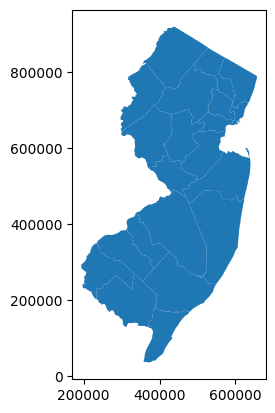

In [6]:
#make the map
nj.plot()

In [7]:
# Ver las primeras filas de la tabla de atributos
nj.head()

# Ver solo los nombres de las columnas
nj.columns

# Si querés ver valores únicos de una columna que podría ser el nombre del county
nj["ACRES"].unique()


,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,395066,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.69 491361.78, 436701.19 49135..."
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,532498,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.99 423475.83, 342804.1 423429..."
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,95089,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.73 177065.13, 390410.17 17705..."


Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

array([390815.404215 , 153490.275182 , 525002.68359  , 145650.507808 ,
       183126.57424  , 321150.321572 ,  83034.8594887, 215166.893094 ,
        32982.4007942, 279885.206384 , 146431.864374 , 310834.264884 ,
       485078.440831 , 126926.846048 , 222158.656047 , 195127.363184 ,
       342730.853674 ,  67438.5925946, 232061.359022 , 308084.429543 ,
       202859.561527 ])

<Axes: >

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(0.5, 1.0, 'New Jersey Counties with Labels MAP')

(np.float64(170515.9983667597),
 np.float64(680228.4248388171),
 np.float64(-9284.43030238487),
 np.float64(963779.6277322728))

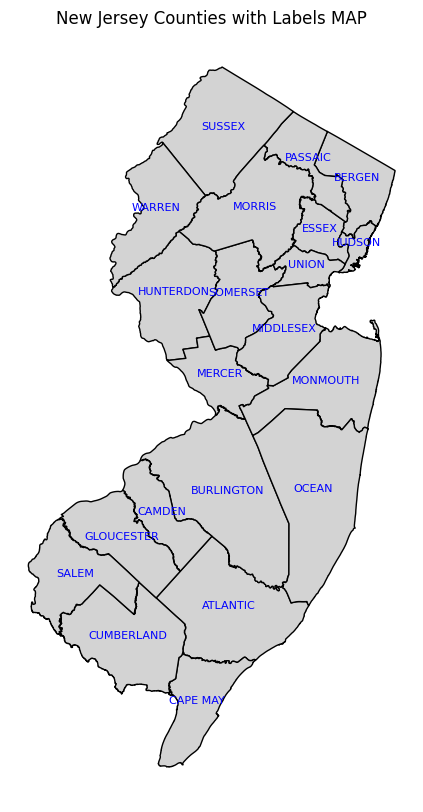

In [8]:
# I want to show the map with the County' names
fig, ax = plt.subplots(figsize=(10,10))

# show the map
nj.plot(ax=ax, edgecolor="black", facecolor="lightgray")

# to add county' names (COUNTY)
for idx, row in nj.iterrows():
    plt.annotate(
        text=row["COUNTY"],              # nombre del county
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),  # coordenadas del centroide
        ha="center", fontsize=8, color="blue"
    )

plt.title("New Jersey Counties with Labels MAP")
plt.axis("off")
plt.show()

#PS1

##Comments from PS0 (HERE)
##Comments from Professor (A) by email:
A: could think about u/a or level of analysis! and actual datasets and variables--provide link to them and describe them; start getting actual data you want to use in this class

S: ok, my u/a is countyes.

see specific repos below, if you dont see yourself below do email me!


https://github.com/shirleyrutgers/GIS/blob/main/PS0_FV.ipynb
this is great, there is u/a and actual datasets

S: Thank you!

A: btw see what benito did https://github.com/Ben-069/GIS-Public-Sector

S: Ok I did.

##Comments from class
A: Merge with Outer, not left, and show Indicator.
Maybe use colors from blues to green to make it look nicer.

S: ok, I will fix that in my PS1 code.

Some additional ideas:
Maybe you can see the number of companies per capita, but divided by the number of people in the sector.
Note: factor in education plus Location Quotient, more income (see if there's a relationship between more location quotient and more income).
S: I agree, maybe there is a correlationship between these variables and is important to check the business formation per capita weighted by the sector population of interest.

S: Also I have these variables in my dataset, for example>
County,	Employment,	Unemployment,	GDP per capita,	Median Income,	BA2023	Employment Location Quotient Relative to U.S.,	Total Wage Location Quotient Relative to U.S.

Link for PS1> https://theaok.github.io/gisPy/ps1.pdf

#Instructions PS1
joining data and producing pretty and interesting thematic map(s)
 [version: Thursday 11th September, 2025 13:38]
 due in 2 weeks; sep25
 1. may be di cult start early!
 2. produce a thematic map (or maps!)
 3. you must map 2 variables (so typically youll have 2 maps, but can also have 2 vars in one map); these 2 vars must not come
 from the gis data, but you must join them from traditional data sets from 2 di erent places; if you cannot nd such data, email
 listserv; again, to repeat, regular (say csv) data has to come from 2 di erent les, say FBI and Census, or say WHO and World
 Bank, etc; the bottom line is that you have to perform join twice!!
 HINT:
 better fewer maps! if like 5 minutes presentation, have like 3 maps; max 5 maps, no more than 1 visual per 1 minute!!! (sure have
 more in ipynb but present only 1-5)
 likewise in notebooks: do slow down, think about it, better fewer quality maps than a bunch of junk maps

More comments>
A: looks great!

just make sure to have the original location of the data, eg https://www.bls.gov/cew/about-data/location-quotients-explained.htm
and then what you clicked on to get the data you have in your google drive
S: I added the links.

A:and do interpret in substantive terms: eg we see highest eco activity in terms of gdp per capita in north east of the state etc etc

right for the subsequent ps can add more data eg percent foreign born; percent working age; percent with higher education etc etc
S:ok

A:it is ok to name df with numbers df1 df2 etc; may be more meaningful however to name substantively eg lq, gdp, etc
S: for my logic now works better numbers but I get it.

per refining display maybe use the code we had in class where you have clear bins as opposed to continuous scale--just copy paste my code and only change dataset and variable names

#Dataset

#original location of the data


NJ business applications https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhIWXDHIusT7myBctQLeKRlPvg7V7YVIweyIMU7W3I3NKX2UjTMNKPA995O1JTQ/pub?gid=1018220772&single=true&output=csv

Location Quotient variable review
Because the impact of the level of Gross Domestic Product per capita or level of income per County is not very significant, we seek to add a new variable as a proxy for these indicators, new variable Location quotient.

In the database we have the variables LQ> Employment Location Quotient Relative to U.S. and Total Wage Location Quotient Relative to U.S. The explanation> If an LQ is equal to 1, then the industry has the same share of its area employment (or total wage) as it does in the nation. An LQ greater than 1 indicates an industry with a greater share of the local area employment (or wages) than is the case nationwide. For example, Bergen 1.05 Employment Location Quotient Relative to U.S.

https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pubhtml?gid=2115564207&single=true

https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pub?gid=2115564207&single=true&output=csv

In [12]:
#Install from Data Vis Class
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
plt.style.use('default') # more delicate subtle than classic
#plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas

In [13]:
#NJ Data>  County  Employment  Unemployment Population GDP  Median Income
#Assumptions of the research NJ data county is df1
import pandas as pd
df1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRCnEjufrgpP0UB0Quxx8nYC56Yw0C7ZuWMDjPj9H8BrUF8hPGSPBpmcGlJKc0xhA/pub?gid=2071317397&single=true&output=csv')
#print(df1)
df1.head()

,County,Employment,Unemployment,Population,GDP,Median Income
0,Atlantic,100709,12.5,"266,105",12593490,62678
1,Bergen,426341,7.6,"930,390",70158193,107971
2,Burlington,210681,6.6,"445,702",25725252,88443
3,Camden,229229,8.2,"506,738",23558717,73168
4,Cape May,39046,12.6,"93,086",5070716,66565


In [14]:
#Business Application in NJ, all years 2005 to 2023
#Assumptions of the research Business Application in NJ is df2
df2=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhIWXDHIusT7myBctQLeKRlPvg7V7YVIweyIMU7W3I3NKX2UjTMNKPA995O1JTQ/pub?gid=1018220772&single=true&output=csv')
#print(df2)
df2.head()

,State,County,County Code,fipstate,fipscty,BA2005,BA2006,BA2007,BA2008,BA2009,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,NJ,Atlantic County,34001,34,1,2281,2314,2336,2227,2050,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,NJ,Bergen County,34003,34,3,11218,11633,11833,11537,11091,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,NJ,Burlington County,34005,34,5,3816,3904,4103,3927,3470,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,NJ,Camden County,34007,34,7,3953,4322,4398,4336,3812,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,NJ,Cape May County,34009,34,9,1080,1002,962,915,774,...,803,1014,833,863,906,925,1052,1334,1284,1311


In [15]:
#NJ wage per county, 2013 to 2023
#Assumptions of the research NJ Wage is df3
df3=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS8byZhwUGPcnozsRjz2WuI2lUIi84AweOFjg1lM0lSLpEzRQhK-NNBZdKZK9XoEw/pub?gid=69402389&single=true&output=csv')
#print(df3)
df3.head()

,County,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Atlantic,"$ 37,387","$ 38,568","$ 39,665","$ 40,362","$ 41,682","$ 42,850","$ 43,772","$ 49,306","$ 51,055","$ 52,852","$ 54,201"
1,Bergen,"$ 60,510","$ 62,191","$ 63,085","$ 63,323","$ 63,997","$ 65,378","$ 66,972","$ 73,426","$ 75,903","$ 77,278","$ 79,275"
2,Burlington,"$ 50,801","$ 51,597","$ 53,798","$ 53,456","$ 54,639","$ 56,829","$ 58,262","$ 64,983","$ 66,584","$ 67,974","$ 68,992"
3,Camden,"$ 47,212","$ 46,680","$ 49,078","$ 49,585","$ 51,162","$ 52,445","$ 54,335","$ 59,994","$ 62,506","$ 63,260","$ 64,846"
4,Cape May,"$ 30,578","$ 31,183","$ 32,361","$ 33,248","$ 33,359","$ 34,088","$ 35,378","$ 39,104","$ 41,103","$ 42,920","$ 44,209"


In [16]:
#print(df3.dtypes)

In [17]:
# 0) Limpiar espacios en los nombres de columnas
df3.columns = df3.columns.str.strip()

# 1) Eliminar "$", la coma y el espacio extra
df3.iloc[:, 1:] = df3.iloc[:, 1:].replace(r'[\$, ]', '', regex=True)

# 2) Convertir a numérico
df3.iloc[:, 1:] = df3.iloc[:, 1:].astype(float)

# 3) Verificar
print(df3.head())
#print(df3.dtypes)


       County     2013     2014     2015     2016     2017     2018     2019  \
0    Atlantic  37387.0  38568.0  39665.0  40362.0  41682.0  42850.0  43772.0   
1      Bergen  60510.0  62191.0  63085.0  63323.0  63997.0  65378.0  66972.0   
2  Burlington  50801.0  51597.0  53798.0  53456.0  54639.0  56829.0  58262.0   
3      Camden  47212.0  46680.0  49078.0  49585.0  51162.0  52445.0  54335.0   
4    Cape May  30578.0  31183.0  32361.0  33248.0  33359.0  34088.0  35378.0   

      2020     2021     2022     2023  
0  49306.0  51055.0  52852.0  54201.0  
1  73426.0  75903.0  77278.0  79275.0  
2  64983.0  66584.0  67974.0  68992.0  
3  59994.0  62506.0  63260.0  64846.0  
4  39104.0  41103.0  42920.0  44209.0  


In [18]:
#NJ wage per county, 2013 to 2023
df3.head()

,County,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Atlantic,37387.0,38568.0,39665.0,40362.0,41682.0,42850.0,43772.0,49306.0,51055.0,52852.0,54201.0
1,Bergen,60510.0,62191.0,63085.0,63323.0,63997.0,65378.0,66972.0,73426.0,75903.0,77278.0,79275.0
2,Burlington,50801.0,51597.0,53798.0,53456.0,54639.0,56829.0,58262.0,64983.0,66584.0,67974.0,68992.0
3,Camden,47212.0,46680.0,49078.0,49585.0,51162.0,52445.0,54335.0,59994.0,62506.0,63260.0,64846.0
4,Cape May,30578.0,31183.0,32361.0,33248.0,33359.0,34088.0,35378.0,39104.0,41103.0,42920.0,44209.0


In [19]:
#Location Quotient
#Assumptions of the research Location Quotient is df4
df4 = pd.read_csv ('https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pub?gid=2115564207&single=true&output=csv')
#print(df4)
#df4.head()

/tmp/ipython-input-3064815203.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv ('https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pub?gid=2115564207&single=true&output=csv')


In [20]:
# I will start with the dataframe about Loction Quotient, so I need to choose the columns that I will need and filter per county New Jersey.
#Filter df4 for New Jersey, Private Ownership, and Total Industry, excluding undefined areas
df4_filtered = df4[
    (df4["Area Type"] == "County") &
    (df4["St Name"] == "New Jersey") &
    (df4["Ownership"] == "Private") &
    (df4["Industry"] == "10 Total, all industries") &
    (df4["Area"] != "Unknown Or Undefined, New Jersey")
]

# Display the filtered results
df4_filtered.head()

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31851,34001,34,1.0,5,10,2023,A,County,New Jersey,"Atlantic County, New Jersey",Private,"10 Total, all industries",NaN,"6,911","105,030","5,692,663,077","1,042","54,200",0.98,0.92
31869,34003,34,3.0,5,10,2023,A,County,New Jersey,"Bergen County, New Jersey",Private,"10 Total, all industries",NaN,"35,098","392,497","31,115,189,292","1,525","79,275",1.05,1.05
31887,34005,34,5.0,5,10,2023,A,County,New Jersey,"Burlington County, New Jersey",Private,"10 Total, all industries",NaN,"11,926","183,809","12,681,241,373","1,327","68,992",1.03,1.02
31905,34007,34,7.0,5,10,2023,A,County,New Jersey,"Camden County, New Jersey",Private,"10 Total, all industries",NaN,"13,387","176,138","11,421,783,386","1,247","64,845",1.01,0.98
31923,34009,34,9.0,5,10,2023,A,County,New Jersey,"Cape May County, New Jersey",Private,"10 Total, all industries",NaN,"3,877","34,725","1,535,183,337",850,"44,209",0.96,0.89


In [21]:
# Rename the column
df4_filtered = df4_filtered.rename(columns={"Area": "County"})
# Eliminar " County, New Jersey" de todos los nombres
df4_filtered["County"] = df4_filtered["County"].str.replace(" County, New Jersey", "", regex=False)
df4_filtered.head()


,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,County,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31851,34001,34,1.0,5,10,2023,A,County,New Jersey,Atlantic,Private,"10 Total, all industries",NaN,"6,911","105,030","5,692,663,077","1,042","54,200",0.98,0.92
31869,34003,34,3.0,5,10,2023,A,County,New Jersey,Bergen,Private,"10 Total, all industries",NaN,"35,098","392,497","31,115,189,292","1,525","79,275",1.05,1.05
31887,34005,34,5.0,5,10,2023,A,County,New Jersey,Burlington,Private,"10 Total, all industries",NaN,"11,926","183,809","12,681,241,373","1,327","68,992",1.03,1.02
31905,34007,34,7.0,5,10,2023,A,County,New Jersey,Camden,Private,"10 Total, all industries",NaN,"13,387","176,138","11,421,783,386","1,247","64,845",1.01,0.98
31923,34009,34,9.0,5,10,2023,A,County,New Jersey,Cape May,Private,"10 Total, all industries",NaN,"3,877","34,725","1,535,183,337",850,"44,209",0.96,0.89


In [22]:
#Another way
# Rename the column
#df4_filtered = df4_filtered.rename(columns={"Area": "County"})

# Replace full county names with simplified ones
#df4_filtered["County"] = df4_filtered["County"].replace({
 #   "Atlantic County, New Jersey": "Atlantic",
 #   "Bergen County, New Jersey": "Bergen",
 #   "Burlington County, New Jersey": "Burlington",
 #   "Camden County, New Jersey": "Camden",
 #   "Cape May County, New Jersey": "Cape May",
 #   "Cumberland County, New Jersey": "Cumberland",
 #   "Essex County, New Jersey": "Essex",
 #   "Gloucester County, New Jersey": "Gloucester",
 #   "Hudson County, New Jersey": "Hudson",
 #   "Hunterdon County, New Jersey": "Hunterdon",
 #   "Mercer County, New Jersey": "Mercer",
 #   "Middlesex County, New Jersey": "Middlesex",
 #   "Monmouth County, New Jersey": "Monmouth",
 #   "Morris County, New Jersey": "Morris",
 #   "Ocean County, New Jersey": "Ocean",
 #   "Passaic County, New Jersey": "Passaic",
 #   "Salem County, New Jersey": "Salem",
 #   "Somerset County, New Jersey": "Somerset",
 #   "Sussex County, New Jersey": "Sussex",
 #   "Union County, New Jersey": "Union",
 #   "Warren County, New Jersey": "Warren"})


In [23]:
#I need to clean more the dataframe, in terms of just variables that I would like to study>
df4_table = df4_filtered[[
    "County",
    "Annual Average Establishment Count",
    "Annual Average Employment",
    "Annual Total Wages",
    "Annual Average Weekly Wage",
    "Annual Average Pay",
    "Employment Location Quotient Relative to U.S.",
    "Total Wage Location Quotient Relative to U.S."
]]

# now I will show the table
df4_table.head()

,County,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31851,Atlantic,"6,911","105,030","5,692,663,077","1,042","54,200",0.98,0.92
31869,Bergen,"35,098","392,497","31,115,189,292","1,525","79,275",1.05,1.05
31887,Burlington,"11,926","183,809","12,681,241,373","1,327","68,992",1.03,1.02
31905,Camden,"13,387","176,138","11,421,783,386","1,247","64,845",1.01,0.98
31923,Cape May,"3,877","34,725","1,535,183,337",850,"44,209",0.96,0.89


Text(0.98, 0.93, 'Atlantic')

Text(1.05, 1.06, 'Bergen')

Text(1.03, 1.03, 'Burlington')

Text(1.01, 0.99, 'Camden')

Text(0.96, 0.9, 'Cape May')

Text(0.98, 0.95, 'Cumberland')

Text(0.93, 0.92, 'Essex')

Text(0.99, 0.96, 'Gloucester')

Text(1.0, 1.03, 'Hudson')

Text(1.01, 1.02, 'Hunterdon')

Text(0.83, 0.88, 'Mercer')

Text(1.02, 1.02, 'Middlesex')

Text(1.04, 1.03, 'Monmouth')

Text(1.06, 1.08, 'Morris')

Text(1.01, 0.97, 'Ocean')

Text(0.99, 0.96, 'Passaic')

Text(0.97, 0.99, 'Salem')

Text(1.07, 1.1, 'Somerset')

Text(0.96, 0.9400000000000001, 'Sussex')

Text(1.02, 1.03, 'Union')

Text(1.0, 0.99, 'Warren')

Text(0.5, 1.0, 'Employment LQ vs Total Wage LQ (Relative to U.S.) Total Industry')

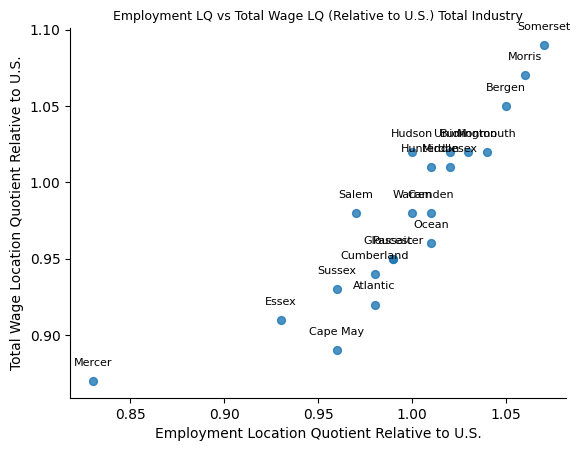

In [24]:
#From Data Vis Class
# Employment Location Quotient Relative to U.S. vs Total Wage Location Quotient Relative to U.S.

#from matplotlib import pyplot as plt
#df4_table.plot(kind='scatter', x='Employment Location Quotient Relative to U.S.', y='Total Wage Location Quotient Relative to U.S.', s=32, alpha=.8)
#plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt

ax = df4_table.plot(kind='scatter', x='Employment Location Quotient Relative to U.S.', y='Total Wage Location Quotient Relative to U.S.', s=32, alpha=.8)

# Add county labels
for i, row in df4_table.iterrows():
    plt.text(row['Employment Location Quotient Relative to U.S.'], row['Total Wage Location Quotient Relative to U.S.']+ 0.01, row['County'], fontsize=8, ha='center')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Employment LQ vs Total Wage LQ (Relative to U.S.) Total Industry", fontsize=9)
plt.show()

In [29]:
#I need to compare my dataframe and my maps data. So, I have to do some adjustment in the format of the column  County>
# I could replace for UPPER or create another column with all values transformed in case I need the original one to merge with other dataset.
#use this one df4_table["COUNTY"] = df4_table["County"].str.upper()
#df4_table.head()

In [36]:
# Fix Uppercase

df4_table = df4_table.rename(columns={"County": "COUNTY"})
df4_table["COUNTY"] = df4_table["COUNTY"].str.upper().str.strip()

#df4_table["COUNTY"] = df4_table["COUNTY"].str.upper().str.strip()
nj["COUNTY"] = nj["COUNTY"].str.upper().str.strip()

# Outer merge + indicador
nj_merged = nj.merge(
    df4_table,
    on="COUNTY",
    how="outer",
    indicator=True,
    suffixes=("_NJ", "_DF4")
)

# Resumen de coincidencias
print(nj_merged["_merge"].value_counts())

# Listas para depurar
solo_nj = nj_merged.loc[nj_merged["_merge"] == "left_only", "COUNTY"].sort_values().tolist()
solo_df4 = nj_merged.loc[nj_merged["_merge"] == "right_only", "COUNTY"].sort_values().tolist()
print("Solo en nj:", solo_nj)
print("Solo en df4_table:", solo_df4)

# Para mapear (excluye filas sin geometría)
to_map = nj_merged[nj_merged.geometry.notna()]


_merge
both          21
left_only      0
right_only     0
Name: count, dtype: int64
Solo en nj: []
Solo en df4_table: []


<Axes: >

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(0.5, 1.0, 'Employment Location Quotient Relative to U.S. by County in New Jersey')

(np.float64(170515.9983667597),
 np.float64(680228.4248388171),
 np.float64(-9284.43030238487),
 np.float64(963779.6277322728))

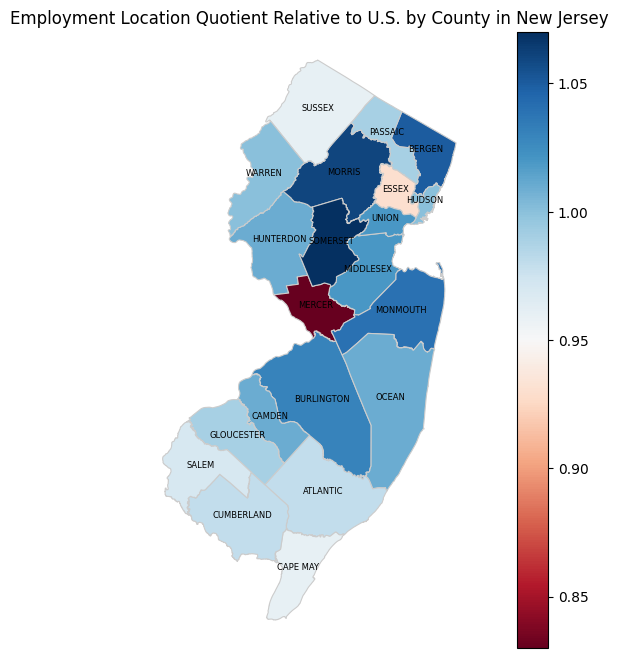

In [37]:
# Create maps
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Maps with colors by Employment LQ
nj_merged.plot(
    column="Employment Location Quotient Relative to U.S.",
    cmap="RdBu",         #viridis,  # other 'plasma', 'OrRd', 'Blues'
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)

# Name of counties at center
for idx, row in nj_merged.iterrows():
    plt.annotate(
        text=row["COUNTY"],
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.centroid.y),
        horizontalalignment="center",
        fontsize=6,
        color="black"
    )

ax.set_title("Employment Location Quotient Relative to U.S. by County in New Jersey", fontsize=12)
ax.axis("off")

plt.show()

Most counties in New Jersey are close to or slightly above the national average. Northeastern and central counties like Bergen, Morris, and Somerset stand out with higher employment concentration, while Mercer and some southern counties show lower levels.

##Location Quotien in specific sectors> Education and Health

In [38]:
# I will continue with the dataframe about Loction Quotient in Education and Health sectors, so I need to choose the columns that I will need and filter per county New Jersey.
# Filter df4 for New Jersey, Private Ownership, and specific industry (1025 Education and health services), excluding undefined areas
df4_filtered2 = df4[
    (df4["Area Type"] == "County") &
    (df4["St Name"] == "New Jersey") &
    (df4["Ownership"] == "Private") &
    (df4["Industry"] == "1025 Education and health services") &
    (df4["Area"] != "Unknown Or Undefined, New Jersey")
]

# Rename column Area to County
df4_filtered2 = df4_filtered2.rename(columns={"Area": "County"})


# Eliminar " County, New Jersey" de todos los nombres
df4_filtered2["County"] = df4_filtered2["County"].str.replace(" County, New Jersey", "", regex=False)

# Display the filtered results
df4_filtered2.head()

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,County,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31861,34001,34,1.0,5,1025,2023,A,County,New Jersey,Atlantic,Private,1025 Education and health services,NaN,"1,534","20,384","1,309,789,772","1,236","64,257",1.03,1.32
31879,34003,34,3.0,5,1025,2023,A,County,New Jersey,Bergen,Private,1025 Education and health services,NaN,"6,935","89,934","6,504,498,125","1,391","72,325",1.29,1.37
31897,34005,34,5.0,5,1025,2023,A,County,New Jersey,Burlington,Private,1025 Education and health services,NaN,"2,496","34,974","2,275,686,357","1,251","65,067",1.06,1.14
31915,34007,34,7.0,5,1025,2023,A,County,New Jersey,Camden,Private,1025 Education and health services,NaN,"3,530","49,396","3,275,956,706","1,275","66,321",1.52,1.75
31933,34009,34,9.0,5,1025,2023,A,County,New Jersey,Cape May,Private,1025 Education and health services,NaN,453,"4,328","239,683,260","1,065","55,382",0.64,0.87


In [39]:
#I need to clean more the dataframe, in terms of just variables that I would like to study>
df4_table2 = df4_filtered2[[
    "County",
    "Industry",
    "Annual Average Establishment Count",
    "Annual Average Employment",
    "Annual Total Wages",
    "Annual Average Weekly Wage",
    "Annual Average Pay",
    "Employment Location Quotient Relative to U.S.",
    "Total Wage Location Quotient Relative to U.S."
]]

# now I will show the table
df4_table2.head()

,County,Industry,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31861,Atlantic,1025 Education and health services,"1,534","20,384","1,309,789,772","1,236","64,257",1.03,1.32
31879,Bergen,1025 Education and health services,"6,935","89,934","6,504,498,125","1,391","72,325",1.29,1.37
31897,Burlington,1025 Education and health services,"2,496","34,974","2,275,686,357","1,251","65,067",1.06,1.14
31915,Camden,1025 Education and health services,"3,530","49,396","3,275,956,706","1,275","66,321",1.52,1.75
31933,Cape May,1025 Education and health services,453,"4,328","239,683,260","1,065","55,382",0.64,0.87


Text(1.03, 1.33, 'Atlantic')

Text(1.29, 1.3800000000000001, 'Bergen')

Text(1.06, 1.15, 'Burlington')

Text(1.52, 1.76, 'Camden')

Text(0.64, 0.88, 'Cape May')

Text(1.12, 1.39, 'Cumberland')

Text(1.11, 0.99, 'Essex')

Text(0.9, 1.04, 'Gloucester')

Text(0.83, 0.58, 'Hudson')

Text(0.95, 0.97, 'Hunterdon')

Text(1.03, 1.07, 'Mercer')

Text(0.85, 0.78, 'Middlesex')

Text(1.37, 1.61, 'Monmouth')

Text(1.03, 0.89, 'Morris')

Text(1.64, 1.8800000000000001, 'Ocean')

Text(1.17, 1.24, 'Passaic')

Text(0.81, 0.98, 'Salem')

Text(0.87, 0.59, 'Somerset')

Text(0.99, 1.12, 'Sussex')

Text(1.02, 0.91, 'Union')

Text(1.21, 1.37, 'Warren')

Text(0.5, 1.0, 'Employment LQ vs Total Wage LQ (Relative to U.S.) in Education and Health Sectors')

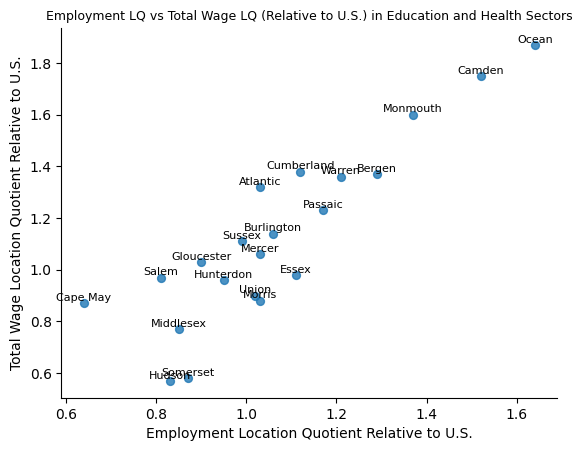

In [40]:
#From Data Vis Class
# Employment Location Quotient Relative to U.S. vs Total Wage Location Quotient Relative to U.S.

#from matplotlib import pyplot as plt
#df4_table.plot(kind='scatter', x='Employment Location Quotient Relative to U.S.', y='Total Wage Location Quotient Relative to U.S.', s=32, alpha=.8)
#plt.gca().spines[['top', 'right',]].set_visible(False)

#from matplotlib import pyplot as plt

ax = df4_table2.plot(kind='scatter', x='Employment Location Quotient Relative to U.S.', y='Total Wage Location Quotient Relative to U.S.', s=32, alpha=.8)

# Add county labels
for i, row in df4_table2.iterrows():
    plt.text(row['Employment Location Quotient Relative to U.S.'], row['Total Wage Location Quotient Relative to U.S.']+ 0.01, row['County'], fontsize=8, ha='center')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Employment LQ vs Total Wage LQ (Relative to U.S.) in Education and Health Sectors", fontsize=9)
plt.show()

In [41]:
# Renombrar columna y pasar valores a mayúsculas
df4_table2 = df4_table2.rename(columns={"County": "COUNTY"})
df4_table2["COUNTY"] = df4_table2["COUNTY"].str.upper().str.strip()

# Verificar
print(df4_table2[["COUNTY"]].head())
df4_table2.head()


           COUNTY
31861    ATLANTIC
31879      BERGEN
31897  BURLINGTON
31915      CAMDEN
31933    CAPE MAY


,COUNTY,Industry,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31861,ATLANTIC,1025 Education and health services,"1,534","20,384","1,309,789,772","1,236","64,257",1.03,1.32
31879,BERGEN,1025 Education and health services,"6,935","89,934","6,504,498,125","1,391","72,325",1.29,1.37
31897,BURLINGTON,1025 Education and health services,"2,496","34,974","2,275,686,357","1,251","65,067",1.06,1.14
31915,CAMDEN,1025 Education and health services,"3,530","49,396","3,275,956,706","1,275","66,321",1.52,1.75
31933,CAPE MAY,1025 Education and health services,453,"4,328","239,683,260","1,065","55,382",0.64,0.87


In [42]:
# Outer merge con indicador
nj_merged2 = nj.merge(df4_table2, on="COUNTY", how="outer", indicator=True)

# Resumen de coincidencias
print(nj_merged2["_merge"].value_counts())

# Filtrar filas con geometría para mapa
to_map2 = nj_merged2[nj_merged2.geometry.notna()]

_merge
both          21
left_only      0
right_only     0
Name: count, dtype: int64


<Axes: >

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(0.5, 1.0, 'Employment LQ Relative to U.S. Education and Health by County in New Jersey')

(np.float64(170515.9983667597),
 np.float64(680228.4248388171),
 np.float64(-9284.43030238487),
 np.float64(963779.6277322728))

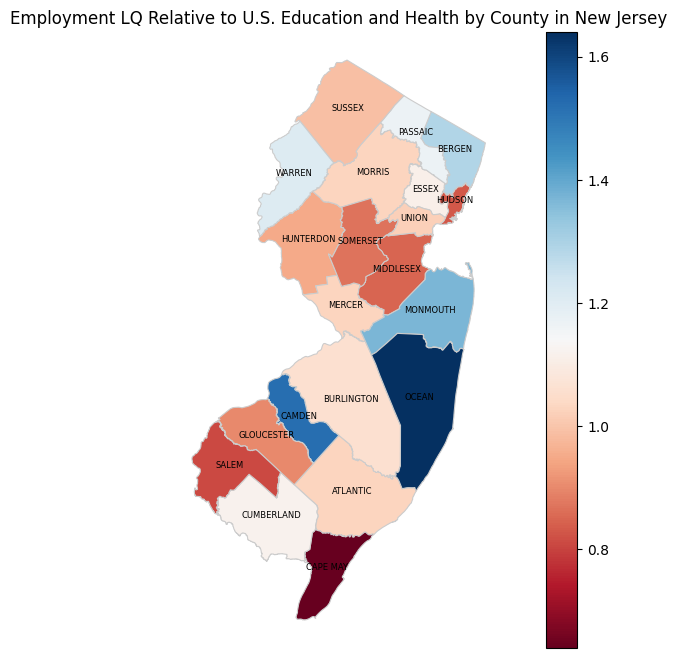

In [43]:
#MAPS

# Filter only row with geometry (outer merge)
to_map2 = nj_merged2[nj_merged2.geometry.notna()].copy()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Maps Employment LQ
to_map2.plot(
    column="Employment Location Quotient Relative to U.S.",
    cmap="RdBu",              # usa RdBu; invierte con "RdBu_r" or azul=alto
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "edgecolor": "white", "label": "Sin datos"}
)

# County name at center
for _, row in to_map2.iterrows():
    c = row["geometry"].centroid
    ax.annotate(
        text=row["COUNTY"],
        xy=(c.x, c.y),
        ha="center",
        fontsize=6,
        color="black"
    )

ax.set_title("Employment LQ Relative to U.S. Education and Health by County in New Jersey", fontsize=12)
ax.axis("off")
plt.show()


We observe higher employment concentration in education and health in counties like Ocean and Camden, while Cape May and several southern counties show lower relative levels.

#Some adjustments in dataframes about Business Application before merge

In [50]:
#import pandas as pd

# Rename "Último Valor" to "BA2023" to clearly indicate business applications in 2023
df2 = df2.rename(columns={"Último Valor": "BA2023"})

# Ensure "BA2023" is numeric for aggregation
df2["BA2023"] = pd.to_numeric(df2["BA2023"], errors="coerce")

# Compute the total sum and average of business applications in New Jersey for 2023
total_applications = df2["BA2023"].sum()
average_applications = df2["BA2023"].mean()

# Create a summary DataFrame
df2_summary = pd.DataFrame({
    "Metric": ["Total Applications", "Average Applications per County"],
    "BA2023": [total_applications, average_applications]
})

# Display the summary dataset
print(df2_summary)


                            Metric         BA2023
0               Total Applications  160117.000000
1  Average Applications per County    7624.619048


In [51]:
df2.head()

,State,COUNTY,County Code,fipstate,fipscty,BA2005,BA2006,BA2007,BA2008,BA2009,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,NJ,ATLANTIC,34001,34,1,2281,2314,2336,2227,2050,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,NJ,BERGEN,34003,34,3,11218,11633,11833,11537,11091,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,NJ,BURLINGTON,34005,34,5,3816,3904,4103,3927,3470,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,NJ,CAMDEN,34007,34,7,3953,4322,4398,4336,3812,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,NJ,CAPE MAY,34009,34,9,1080,1002,962,915,774,...,803,1014,833,863,906,925,1052,1334,1284,1311


In [52]:
df2 = df2.rename(columns={"County": "COUNTY"})
df2["COUNTY"] = df2["COUNTY"].str.upper().str.strip()
print(df2[["COUNTY"]].head())


       COUNTY
0    ATLANTIC
1      BERGEN
2  BURLINGTON
3      CAMDEN
4    CAPE MAY


In [53]:
#remove the space and COUNTY after each County name
df2["COUNTY"] = df2["COUNTY"].str.replace(r"\s+COUNTY$", "", regex=True).str.strip()


In [54]:
#check if I can do the merge now
print(nj[["COUNTY"]].head())

       COUNTY
0    ATLANTIC
1      BERGEN
2  BURLINGTON
3      CAMDEN
4    CAPE MAY


In [55]:
#Merge NJ Maps with Business Application dataframe
nj_merged_df2 = nj.merge(df2, on="COUNTY", how="outer", indicator=True)
print(nj_merged_df2["_merge"].value_counts())


_merge
both          21
left_only      0
right_only     0
Name: count, dtype: int64


<Axes: >

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(0.5, 1.0, 'Business Applications by County in New Jersey (2023)')

(np.float64(170515.9983667597),
 np.float64(680228.4248388171),
 np.float64(-9284.43030238487),
 np.float64(963779.6277322728))

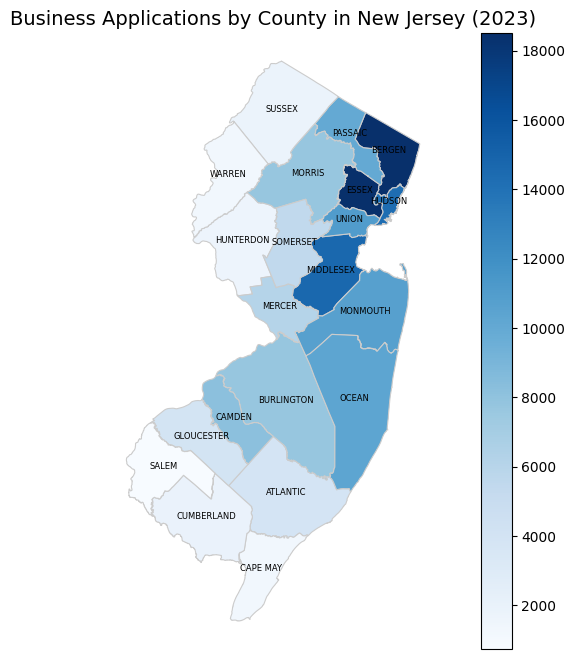

In [56]:
#Ready to build the maps
to_map_df2 = nj_merged_df2[nj_merged_df2.geometry.notna()].copy()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

to_map_df2.plot(
    column="BA2023",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "edgecolor": "white", "label": "Sin datos"}
)

for _, row in to_map_df2.iterrows():
    c = row["geometry"].centroid
    ax.annotate(
        text=row["COUNTY"],
        xy=(c.x, c.y),
        ha="center",
        fontsize=6,
        color="black"
    )

ax.set_title("Business Applications by County in New Jersey (2023)", fontsize=14)
ax.axis("off")
plt.show()


Business applications are concentrated in the northeastern counties such as Bergen, Essex, Hudson, and Union, while southern counties show much lower levels of activity.

<Axes: >

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(0.5, 1.0, 'Business Applications by County in New Jersey (2008/Financial crisis)')

(np.float64(170515.9983667597),
 np.float64(680228.4248388171),
 np.float64(-9284.43030238487),
 np.float64(963779.6277322728))

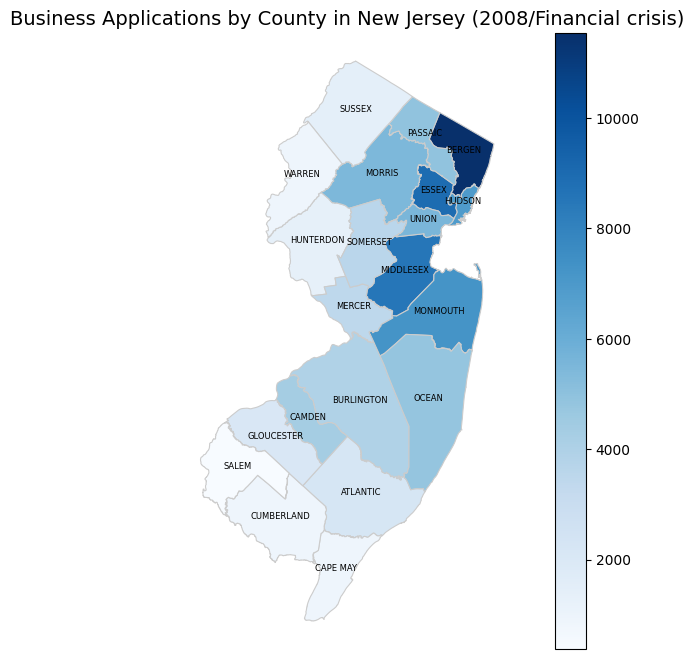

In [57]:
to_map_df2 = nj_merged_df2[nj_merged_df2.geometry.notna()].copy()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

to_map_df2.plot(
    column="BA2008",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "edgecolor": "white", "label": "Sin datos"}
)

for _, row in to_map_df2.iterrows():
    c = row["geometry"].centroid
    ax.annotate(
        text=row["COUNTY"],
        xy=(c.x, c.y),
        ha="center",
        fontsize=6,
        color="black"
    )

ax.set_title("Business Applications by County in New Jersey (2008/Financial crisis)", fontsize=14)
ax.axis("off")
plt.show()


Same conclusion by years, same paterns. Business applications are concentrated in the northeastern counties such as Bergen, Essex, Hudson, and Union, while southern counties show much lower levels of activity.

##Merge dataframe 1 and 2> socioeconomic data and business applications in NJ

In [58]:
df1 = df1.rename(columns={"County": "COUNTY"})
df1["COUNTY"] = df1["COUNTY"].str.upper().str.strip()

df1.head()
df2.head()

,COUNTY,Employment,Unemployment,Population,GDP,Median Income
0,ATLANTIC,100709,12.5,"266,105",12593490,62678
1,BERGEN,426341,7.6,"930,390",70158193,107971
2,BURLINGTON,210681,6.6,"445,702",25725252,88443
3,CAMDEN,229229,8.2,"506,738",23558717,73168
4,CAPE MAY,39046,12.6,"93,086",5070716,66565


,State,COUNTY,County Code,fipstate,fipscty,BA2005,BA2006,BA2007,BA2008,BA2009,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,NJ,ATLANTIC,34001,34,1,2281,2314,2336,2227,2050,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,NJ,BERGEN,34003,34,3,11218,11633,11833,11537,11091,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,NJ,BURLINGTON,34005,34,5,3816,3904,4103,3927,3470,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,NJ,CAMDEN,34007,34,7,3953,4322,4398,4336,3812,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,NJ,CAPE MAY,34009,34,9,1080,1002,962,915,774,...,803,1014,833,863,906,925,1052,1334,1284,1311


In [59]:
#Merge Socioeconomics data with Business Application dataframe
mergedOuter = pd.merge(df1, df2, how='outer', on=['COUNTY'],indicator=True) #outer=keep all
mergedOuter

print(mergedOuter["_merge"].value_counts())

,COUNTY,Employment,Unemployment,Population,GDP,Median Income,State,County Code,fipstate,fipscty,...,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023,_merge
0,ATLANTIC,100709,12.5,"266,105",12593490,62678,NJ,34001,34,1,...,2161,2113,2195,2275,2501,3295,4082,3862,3885,both
1,BERGEN,426341,7.6,"930,390",70158193,107971,NJ,34003,34,3,...,12345,12533,13497,14780,14225,15508,18500,17576,18508,both
2,BURLINGTON,210681,6.6,"445,702",25725252,88443,NJ,34005,34,5,...,3601,3704,4084,4534,4732,5915,7617,6977,7703,both
3,CAMDEN,229229,8.2,"506,738",23558717,73168,NJ,34007,34,7,...,3918,4107,4321,4740,5131,7073,8994,8030,8225,both
4,CAPE MAY,39046,12.6,"93,086",5070716,66565,NJ,34009,34,9,...,1014,833,863,906,925,1052,1334,1284,1311,both
5,CUMBERLAND,58005,9.7,"151,906",6007622,54179,NJ,34011,34,11,...,964,976,1035,983,1169,1496,1983,1877,1982,both
6,ESSEX,326411,9.9,"795,404",52070494,64522,NJ,34013,34,13,...,10179,10820,11957,12988,14072,18866,21361,18122,18476,both
7,GLOUCESTER,136373,7.5,"291,165",14017096,87996,NJ,34015,34,15,...,1855,2032,2099,2244,2268,2981,3826,3666,3977,both
8,HUDSON,317844,8.7,"670,046",43847173,77738,NJ,34017,34,17,...,7720,8050,8585,9008,9512,11378,13484,13100,14321,both
9,HUNTERDON,57934,5.9,"124,823",6820939,117275,NJ,34019,34,19,...,1133,1133,1319,1338,1256,1334,1612,1601,1674,both


_merge
both          21
left_only      0
right_only     0
Name: count, dtype: int64


Explanation

The merge between df1 (socioeconomic indicators) and df2 (business applications) was successful, with all records classified as "both", meaning every county matched perfectly. This ensures a complete integration of socioeconomic data and business applications, allowing for a direct analysis of how economic factors influence business formation in New Jersey without data loss.

Why Did the Merge Work Perfectly? You merged df1 and df2 on "County". Every county in df1 (socioeconomic data) had a matching county in df2 (business applications). Since all counties matched, every row in the merged dataset was classified as "both" under _merge.

What Does "both" Mean? In Pandas' merge operation, the _merge column tells you where the data came from:

"left_only" → Exists only in df1 (socioeconomic indicators). "right_only" → Exists only in df2 (business applications). "both" → Exists in both datasets (perfect match).

##Scatter Plot to see relationship between our variables from the H0
I will use seaborn.scatterplot() to visualize the relationship. X-axis: Gross Domestic Product (GDP).And Y-axis: Business Applications in 2023 (BA2023).

In [60]:
mergedOuter.head()

,COUNTY,Employment,Unemployment,Population,GDP,Median Income,State,County Code,fipstate,fipscty,...,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023,_merge
0,ATLANTIC,100709,12.5,"266,105",12593490,62678,NJ,34001,34,1,...,2161,2113,2195,2275,2501,3295,4082,3862,3885,both
1,BERGEN,426341,7.6,"930,390",70158193,107971,NJ,34003,34,3,...,12345,12533,13497,14780,14225,15508,18500,17576,18508,both
2,BURLINGTON,210681,6.6,"445,702",25725252,88443,NJ,34005,34,5,...,3601,3704,4084,4534,4732,5915,7617,6977,7703,both
3,CAMDEN,229229,8.2,"506,738",23558717,73168,NJ,34007,34,7,...,3918,4107,4321,4740,5131,7073,8994,8030,8225,both
4,CAPE MAY,39046,12.6,"93,086",5070716,66565,NJ,34009,34,9,...,1014,833,863,906,925,1052,1334,1284,1311,both


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='GDP', ylabel='BA2023'>

Text(0.5, 0, 'Gross Domestic Product (GDP)')

Text(0, 0.5, 'Business Applications in 2023 (BA2023)')

Text(0.5, 1.0, 'Scatter Plot: GDP vs Business Applications in NJ (2023)')

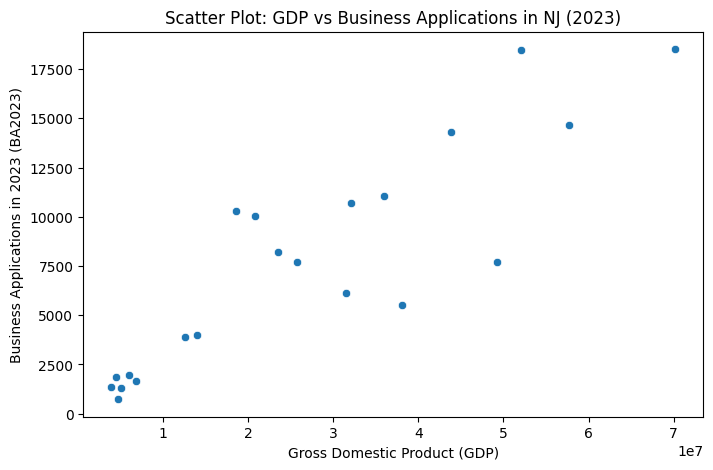

In [61]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Gross Domestic Product vs. Business Applications (BA2023)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=mergedOuter, x="GDP", y="BA2023")

# Add labels and title
plt.xlabel("Gross Domestic Product (GDP)")
plt.ylabel("Business Applications in 2023 (BA2023)")
plt.title("Scatter Plot: GDP vs Business Applications in NJ (2023)")

# Show the plot
plt.show()

##Ranking of Counties by GDP per Capita and Business Applications
Since business application counts are reported in absolute terms by county, it is important to adjust the scale of GDP to allow for fair comparisons across regions. Some counties may have high GDP levels simply due to larger populations. To address this, a new variable was created to represent Gross Domestic Product per capita, calculated by dividing total GDP by the population of each county. This variable helps to capture the average economic output per resident and allows for a more meaningful analysis of its relationship with business formation.

In [62]:
# Convert 'Population' column to numeric, handling errors (e.g., commas)
# Apply a custom function to clean and convert each element
def clean_population(value):
    try:
        # Attempt to convert directly to numeric, removing commas if present
        return pd.to_numeric(str(value).replace(',', ''))
    except ValueError:
        # If conversion fails, return NaN
        return pd.NA

mergedOuter["Population"] = mergedOuter["Population"].apply(clean_population)

In [63]:
mergedOuter.dtypes

,0
COUNTY,object
Employment,int64
Unemployment,float64
Population,int64
GDP,int64
Median Income,int64
State,object
County Code,int64
fipstate,int64
fipscty,int64


In [64]:
# Create new variable: GDP per capita and BA2023 per capita
mergedOuter["GDP per capita"] = mergedOuter["GDP"] / mergedOuter["Population"]
mergedOuter["BA2023 per capita"] = mergedOuter["BA2023"] / mergedOuter["Population"]

In [65]:
#mergedOuter

In [66]:
# for the entery table> mergedOuter[:21].style.background_gradient(cmap='Blues').format(precision=1)
mergedOuter[[
    "COUNTY",
    "Employment",
    "Unemployment",
    "Population",
    "GDP",
    "GDP per capita",
    "Median Income",
    "BA2023",
    "BA2023 per capita"
]][:21].style.background_gradient(cmap='Blues').format(precision=1)

,COUNTY,Employment,Unemployment,Population,GDP,GDP per capita,Median Income,BA2023,BA2023 per capita
0,ATLANTIC,100709,12.5,266105,12593490,47.3,62678,3885,0.0
1,BERGEN,426341,7.6,930390,70158193,75.4,107971,18508,0.0
2,BURLINGTON,210681,6.6,445702,25725252,57.7,88443,7703,0.0
3,CAMDEN,229229,8.2,506738,23558717,46.5,73168,8225,0.0
4,CAPE MAY,39046,12.6,93086,5070716,54.5,66565,1311,0.0
5,CUMBERLAND,58005,9.7,151906,6007622,39.5,54179,1982,0.0
6,ESSEX,326411,9.9,795404,52070494,65.5,64522,18476,0.0
7,GLOUCESTER,136373,7.5,291165,14017096,48.1,87996,3977,0.0
8,HUDSON,317844,8.7,670046,43847173,65.4,77738,14321,0.0
9,HUNTERDON,57934,5.9,124823,6820939,54.6,117275,1674,0.0


In [67]:
print(mergedOuter[["COUNTY"]].head())

       COUNTY
0    ATLANTIC
1      BERGEN
2  BURLINGTON
3      CAMDEN
4    CAPE MAY


In [68]:
print(nj[["COUNTY"]].head())

       COUNTY
0    ATLANTIC
1      BERGEN
2  BURLINGTON
3      CAMDEN
4    CAPE MAY


In [69]:
#I need to merge mergedOuter and NJ maps
nj_merged_df1 = nj.merge(mergedOuter, on="COUNTY", how="outer", indicator="_mergemapsdf1")
to_map_df1 = nj_merged_df1[nj_merged_df1.geometry.notna()].copy()

counts = (
    nj_merged_df1["_mergemapsdf1"]
    .value_counts()
    .reindex(["both", "left_only", "right_only"])
    .fillna(0)
    .astype(int)
)
print(counts)

_mergemapsdf1
both          21
left_only      0
right_only     0
Name: count, dtype: int64


<Axes: >

Text(0.5, 1.0, 'GDP by County')

(np.float64(170515.9983667597),
 np.float64(680228.4248388171),
 np.float64(-9284.43030238487),
 np.float64(963779.6277322728))

<Axes: >

Text(0.5, 1.0, 'Business Applications (BA2023) by County')

(np.float64(170515.9983667597),
 np.float64(680228.4248388171),
 np.float64(-9284.43030238487),
 np.float64(963779.6277322728))

[Text(446845.6710119825, 234718.67854471222, 'ATLANTIC'),
 Text(608674.9722903798, 775344.9010704905, 'BERGEN'),
 Text(445015.10017129, 380378.9908087645, 'BURLINGTON'),
 Text(362977.140254135, 353705.812773536, 'CAMDEN'),
 Text(407013.1101691078, 114992.23820242906, 'CAPE MAY'),
 Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND'),
 Text(562253.4894992855, 711675.2449585614, 'ESSEX'),
 Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER'),
 Text(608428.8356149012, 694107.9908801537, 'HUDSON'),
 Text(377593.6983420124, 631791.0280015195, 'HUNTERDON'),
 Text(435852.78759398806, 528228.3056099586, 'MERCER'),
 Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX'),
 Text(569736.7056196635, 519774.2489392377, 'MONMOUTH'),
 Text(479789.7234039994, 738913.4075906109, 'MORRIS'),
 Text(553566.9451515801, 382793.6503082437, 'OCEAN'),
 Text(547142.4144700206, 801720.2266180195, 'PASSAIC'),
 Text(253014.767951469, 275761.56707926694, 'SALEM'),
 Text(459788.98517990607, 630164.51251089

[Text(446845.6710119825, 234718.67854471222, 'ATLANTIC'),
 Text(608674.9722903798, 775344.9010704905, 'BERGEN'),
 Text(445015.10017129, 380378.9908087645, 'BURLINGTON'),
 Text(362977.140254135, 353705.812773536, 'CAMDEN'),
 Text(407013.1101691078, 114992.23820242906, 'CAPE MAY'),
 Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND'),
 Text(562253.4894992855, 711675.2449585614, 'ESSEX'),
 Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER'),
 Text(608428.8356149012, 694107.9908801537, 'HUDSON'),
 Text(377593.6983420124, 631791.0280015195, 'HUNTERDON'),
 Text(435852.78759398806, 528228.3056099586, 'MERCER'),
 Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX'),
 Text(569736.7056196635, 519774.2489392377, 'MONMOUTH'),
 Text(479789.7234039994, 738913.4075906109, 'MORRIS'),
 Text(553566.9451515801, 382793.6503082437, 'OCEAN'),
 Text(547142.4144700206, 801720.2266180195, 'PASSAIC'),
 Text(253014.767951469, 275761.56707926694, 'SALEM'),
 Text(459788.98517990607, 630164.51251089

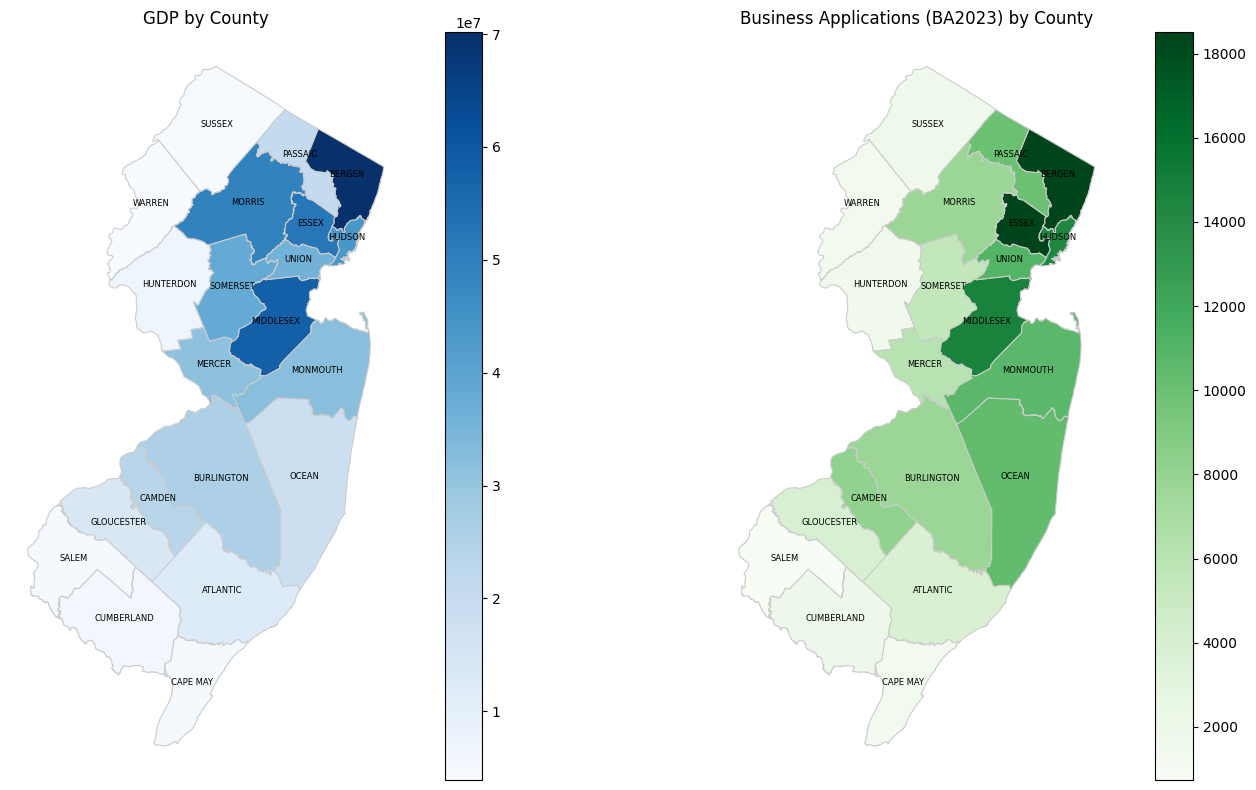

In [70]:
#I want to show a map with GDP and BA
to_map_df1 = nj_merged_df1[nj_merged_df1.geometry.notna()].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

to_map_df1.plot(
    column="GDP",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=axes[0],
    missing_kwds={"color": "lightgrey", "edgecolor": "white", "label": "Sin datos"}
)
axes[0].set_title("GDP by County")
axes[0].axis("off")

to_map_df1.plot(
    column="BA2023",
    cmap="Greens",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=axes[1],
    missing_kwds={"color": "lightgrey", "edgecolor": "white", "label": "Sin datos"}
)
axes[1].set_title("Business Applications (BA2023) by County")
axes[1].axis("off")

for ax in axes: [ax.annotate(r["COUNTY"], (r.geometry.centroid.x, r.geometry.centroid.y), ha="center", fontsize=6, color="black") for _, r in to_map_df1.iterrows()]

plt.tight_layout()
plt.show()


GDP by County: We see the highest GDP concentrated in the northeastern counties (Bergen, Hudson, Essex, and Middlesex), while the southern part of the state shows lower levels of economic activity.

Business Applications (BA2023) by County: Business formation is strongest in the northern and central counties (Bergen, Essex, Hudson, Middlesex), whereas southern counties report fewer applications.

<Axes: >

Text(0.5, 1.0, 'GDP per capita by County')

(np.float64(170515.9983667597),
 np.float64(680228.4248388171),
 np.float64(-9284.43030238487),
 np.float64(963779.6277322728))

<Axes: >

Text(0.5, 1.0, 'Business Applications (BA2023) per capita by County')

(np.float64(170515.9983667597),
 np.float64(680228.4248388171),
 np.float64(-9284.43030238487),
 np.float64(963779.6277322728))

[Text(446845.6710119825, 234718.67854471222, 'ATLANTIC'),
 Text(608674.9722903798, 775344.9010704905, 'BERGEN'),
 Text(445015.10017129, 380378.9908087645, 'BURLINGTON'),
 Text(362977.140254135, 353705.812773536, 'CAMDEN'),
 Text(407013.1101691078, 114992.23820242906, 'CAPE MAY'),
 Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND'),
 Text(562253.4894992855, 711675.2449585614, 'ESSEX'),
 Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER'),
 Text(608428.8356149012, 694107.9908801537, 'HUDSON'),
 Text(377593.6983420124, 631791.0280015195, 'HUNTERDON'),
 Text(435852.78759398806, 528228.3056099586, 'MERCER'),
 Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX'),
 Text(569736.7056196635, 519774.2489392377, 'MONMOUTH'),
 Text(479789.7234039994, 738913.4075906109, 'MORRIS'),
 Text(553566.9451515801, 382793.6503082437, 'OCEAN'),
 Text(547142.4144700206, 801720.2266180195, 'PASSAIC'),
 Text(253014.767951469, 275761.56707926694, 'SALEM'),
 Text(459788.98517990607, 630164.51251089

[Text(446845.6710119825, 234718.67854471222, 'ATLANTIC'),
 Text(608674.9722903798, 775344.9010704905, 'BERGEN'),
 Text(445015.10017129, 380378.9908087645, 'BURLINGTON'),
 Text(362977.140254135, 353705.812773536, 'CAMDEN'),
 Text(407013.1101691078, 114992.23820242906, 'CAPE MAY'),
 Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND'),
 Text(562253.4894992855, 711675.2449585614, 'ESSEX'),
 Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER'),
 Text(608428.8356149012, 694107.9908801537, 'HUDSON'),
 Text(377593.6983420124, 631791.0280015195, 'HUNTERDON'),
 Text(435852.78759398806, 528228.3056099586, 'MERCER'),
 Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX'),
 Text(569736.7056196635, 519774.2489392377, 'MONMOUTH'),
 Text(479789.7234039994, 738913.4075906109, 'MORRIS'),
 Text(553566.9451515801, 382793.6503082437, 'OCEAN'),
 Text(547142.4144700206, 801720.2266180195, 'PASSAIC'),
 Text(253014.767951469, 275761.56707926694, 'SALEM'),
 Text(459788.98517990607, 630164.51251089

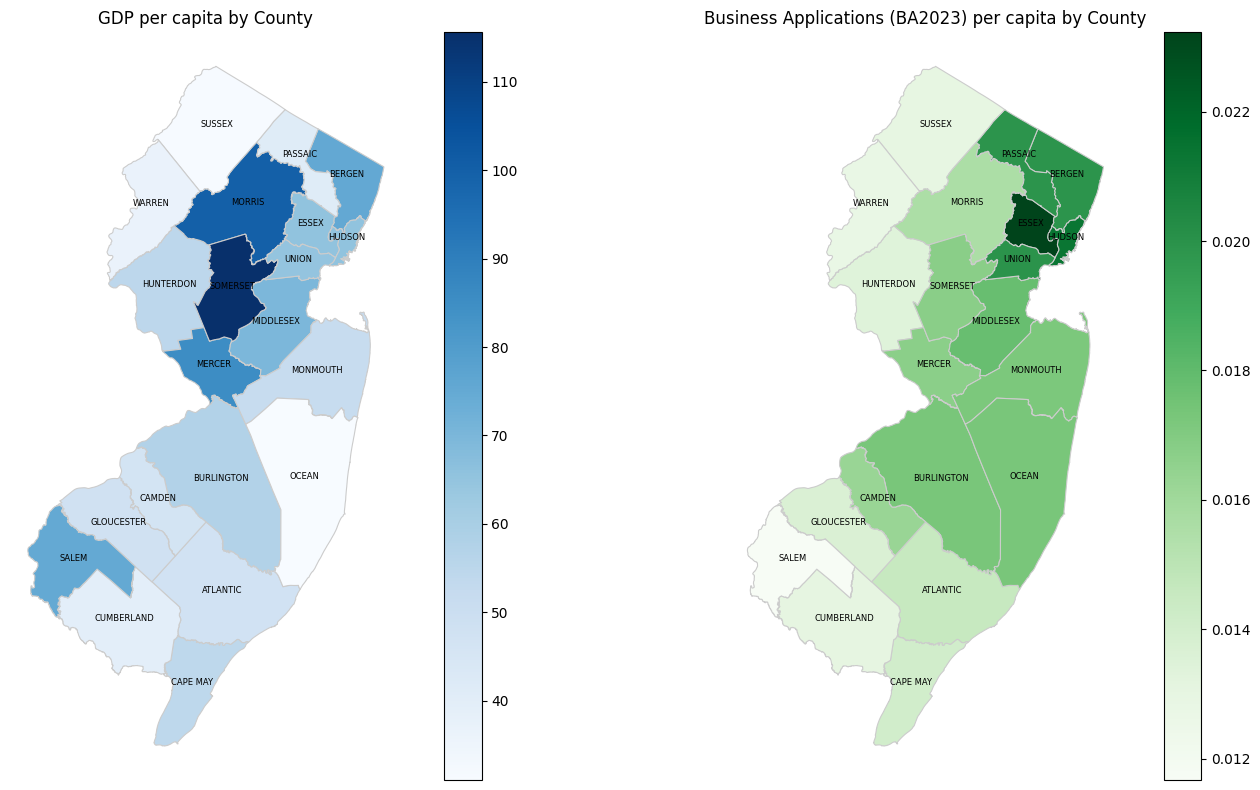

In [71]:
#I want to show a map with GDP and BA per capita
to_map_df1 = nj_merged_df1[nj_merged_df1.geometry.notna()].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

to_map_df1.plot(
    column="GDP per capita",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=axes[0],
    missing_kwds={"color": "lightgrey", "edgecolor": "white", "label": "Sin datos"}
)
axes[0].set_title("GDP per capita by County")
axes[0].axis("off")

to_map_df1.plot(
    column="BA2023 per capita",
    cmap="Greens",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=axes[1],
    missing_kwds={"color": "lightgrey", "edgecolor": "white", "label": "Sin datos"}
)
axes[1].set_title("Business Applications (BA2023) per capita by County")
axes[1].axis("off")

for ax in axes: [ax.annotate(r["COUNTY"], (r.geometry.centroid.x, r.geometry.centroid.y), ha="center", fontsize=6, color="black") for _, r in to_map_df1.iterrows()]

plt.tight_layout()
plt.show()

We see highest eco activity in terms of GDP per capita in north east of the New Jersey State. The same patern are in terms of Business formation percapita.
GDP per capita by County: We observe the highest GDP per capita in central and northeastern counties such as Somerset, Morris, and Bergen, while southern counties show considerably lower levels.

BA2023 per capita by County: Business applications per capita are most concentrated in northeastern counties like Bergen, Essex, Hudson, and Union, with southern counties reporting the lowest rates.

<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition:research/data')

[Text(446845.6710119825, 234718.67854471222, 'ATLANTIC'),
 Text(608674.9722903798, 775344.9010704905, 'BERGEN'),
 Text(445015.10017129, 380378.9908087645, 'BURLINGTON'),
 Text(362977.140254135, 353705.812773536, 'CAMDEN'),
 Text(407013.1101691078, 114992.23820242906, 'CAPE MAY'),
 Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND'),
 Text(562253.4894992855, 711675.2449585614, 'ESSEX'),
 Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER'),
 Text(608428.8356149012, 694107.9908801537, 'HUDSON'),
 Text(377593.6983420124, 631791.0280015195, 'HUNTERDON'),
 Text(435852.78759398806, 528228.3056099586, 'MERCER'),
 Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX'),
 Text(569736.7056196635, 519774.2489392377, 'MONMOUTH'),
 Text(479789.7234039994, 738913.4075906109, 'MORRIS'),
 Text(553566.9451515801, 382793.6503082437, 'OCEAN'),
 Text(547142.4144700206, 801720.2266180195, 'PASSAIC'),
 Text(253014.767951469, 275761.56707926694, 'SALEM'),
 Text(459788.98517990607, 630164.51251089

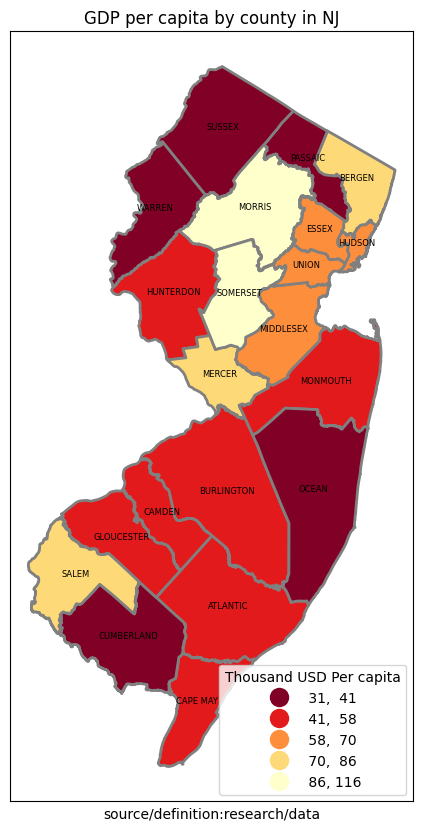

In [80]:
#Use clear bins as opposed to continuous
fig, ax = plt.subplots(1, figsize=(6,10))
nj_merged_df1.plot(ax=ax,column='GDP per capita',legend=True,cmap='YlOrRd_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Thousand USD Per capita''')
ax.title.set_text("GDP per capita by county in NJ")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition:research/data''')
[ax.annotate(r["COUNTY"], (r.geometry.centroid.x, r.geometry.centroid.y), ha="center", fontsize=6, color="black") for _, r in nj_merged_df1.iterrows()]

#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

GDP per capita by County: We observe the highest GDP per capita in central and northeastern counties such as Somerset, Morris, and Bergen, while southern counties show considerably lower levels.

<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition:research/data')

[Text(446845.6710119825, 234718.67854471222, 'ATLANTIC'),
 Text(608674.9722903798, 775344.9010704905, 'BERGEN'),
 Text(445015.10017129, 380378.9908087645, 'BURLINGTON'),
 Text(362977.140254135, 353705.812773536, 'CAMDEN'),
 Text(407013.1101691078, 114992.23820242906, 'CAPE MAY'),
 Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND'),
 Text(562253.4894992855, 711675.2449585614, 'ESSEX'),
 Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER'),
 Text(608428.8356149012, 694107.9908801537, 'HUDSON'),
 Text(377593.6983420124, 631791.0280015195, 'HUNTERDON'),
 Text(435852.78759398806, 528228.3056099586, 'MERCER'),
 Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX'),
 Text(569736.7056196635, 519774.2489392377, 'MONMOUTH'),
 Text(479789.7234039994, 738913.4075906109, 'MORRIS'),
 Text(553566.9451515801, 382793.6503082437, 'OCEAN'),
 Text(547142.4144700206, 801720.2266180195, 'PASSAIC'),
 Text(253014.767951469, 275761.56707926694, 'SALEM'),
 Text(459788.98517990607, 630164.51251089

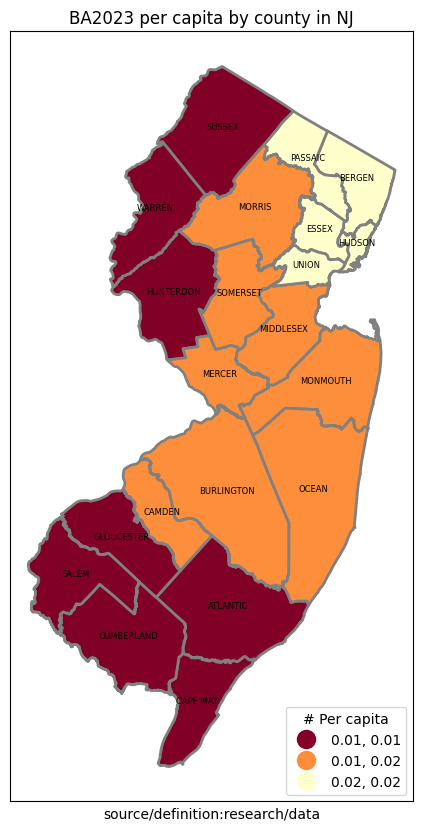

In [86]:
#Use clear bins as opposed to continuous
fig, ax = plt.subplots(1, figsize=(6,10))
nj_merged_df1.plot(ax=ax,column='BA2023 per capita',legend=True,cmap='YlOrRd_r',
          scheme='natural_breaks',k=3, edgecolor='grey',linewidth=2,
          #legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
          legend_kwds={"fmt": "{:,.2f}", "loc": "lower right", "markerscale": 1.4})

leg1 = ax.get_legend()
leg1.set_title('''# Per capita''')
ax.title.set_text("BA2023 per capita by county in NJ")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition:research/data''')
[ax.annotate(r["COUNTY"], (r.geometry.centroid.x, r.geometry.centroid.y), ha="center", fontsize=6, color="black") for _, r in nj_merged_df1.iterrows()]

#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

BA2023 per capita by County: Business applications per capita are most concentrated in northeastern counties like Bergen, Essex, Hudson, and Union, with southern counties reporting the lowest rates